In [1]:
%cd ..

/Users/wangzihang/Downloads/Personal/fin-analyser


In [2]:
from ultralytics import YOLO

# path to your checkpoint
best_path = "model/best.pt"
# this will load both the model architecture and the trained weights
model = YOLO(best_path)

# now you can run inference:
results = model.predict(
    source="data/test/images/20_png_jpg.rf.781c713f59deb4dec5da2da13af356d4.jpg",
    imgsz=1024,
    save=False,
    device="mps",
)


image 1/1 /Users/wangzihang/Downloads/Personal/fin-analyser/data/test/images/20_png_jpg.rf.781c713f59deb4dec5da2da13af356d4.jpg: 1024x1024 4 ADDRESSs, 1 BILLID, 1 DATETIME, 2 FPRICEs, 2 PRODUCTSs, 1 TAX, 2 TPRICEs, 12.4ms
Speed: 9.4ms preprocess, 12.4ms inference, 80.4ms postprocess per image at shape (1, 3, 1024, 1024)


In [3]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'ADDRESS', 1: 'ADDRESSS', 2: 'BILLID', 3: 'DATETIME', 4: 'DISCOUNT', 5: 'DISCOUNT_PERCENTAGE', 6: 'FPRICE', 7: 'PHONE', 8: 'PRODUCTS', 9: 'PRODUCT_NAME', 10: 'SUB_TPRICE', 11: 'TAX', 12: 'TDISCOUNT', 13: 'TPRICE'}
 obb: None
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
 

In [4]:
for r in results:
    box = r.boxes
    print(box)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([11.,  6.,  0.,  3.,  8., 13.,  0.,  0.,  8., 13.,  6.,  2.,  0.], device='mps:0')
conf: tensor([0.8531, 0.8091, 0.7366, 0.6721, 0.6488, 0.4151, 0.4085, 0.4003, 0.3486, 0.3236, 0.3230, 0.3064, 0.2976], device='mps:0')
data: tensor([[2.7836e+02, 2.0905e+02, 3.0201e+02, 2.1524e+02, 8.5308e-01, 1.1000e+01],
        [2.6517e+02, 2.1885e+02, 3.0241e+02, 2.2506e+02, 8.0913e-01, 6.0000e+00],
        [2.0857e+01, 2.9945e+02, 6.1120e+01, 3.0858e+02, 7.3663e-01, 0.0000e+00],
        [2.1435e+02, 1.6016e+02, 2.8031e+02, 1.6695e+02, 6.7209e-01, 3.0000e+00],
        [2.6755e+01, 1.3581e+02, 2.1055e+02, 1.6865e+02, 6.4878e-01, 8.0000e+00],
        [2.8744e+02, 1.3624e+02, 3.0255e+02, 1.4359e+02, 4.1506e-01, 1.3000e+01],
        [2.3799e+02, 4.3367e+01, 3.0484e+02, 4.9857e+01, 4.0850e-01, 0.0000e+00],
        [2.0882e+01, 3.0794e+02, 8.8147e+01, 3.1334e+02, 4.0034e-01, 0.0000e+00],
        [2.0972e+01, 1.9674e+02, 2.1932e+02, 2.179


image 1/1 /Users/wangzihang/Downloads/Personal/fin-analyser/data/test/images/51.jpg: 1024x1024 1 ADDRESS, 1 FPRICE, 7 PRODUCTSs, 1 TAX, 1 TPRICE, 8.1ms
Speed: 3.5ms preprocess, 8.1ms inference, 40.5ms postprocess per image at shape (1, 3, 1024, 1024)


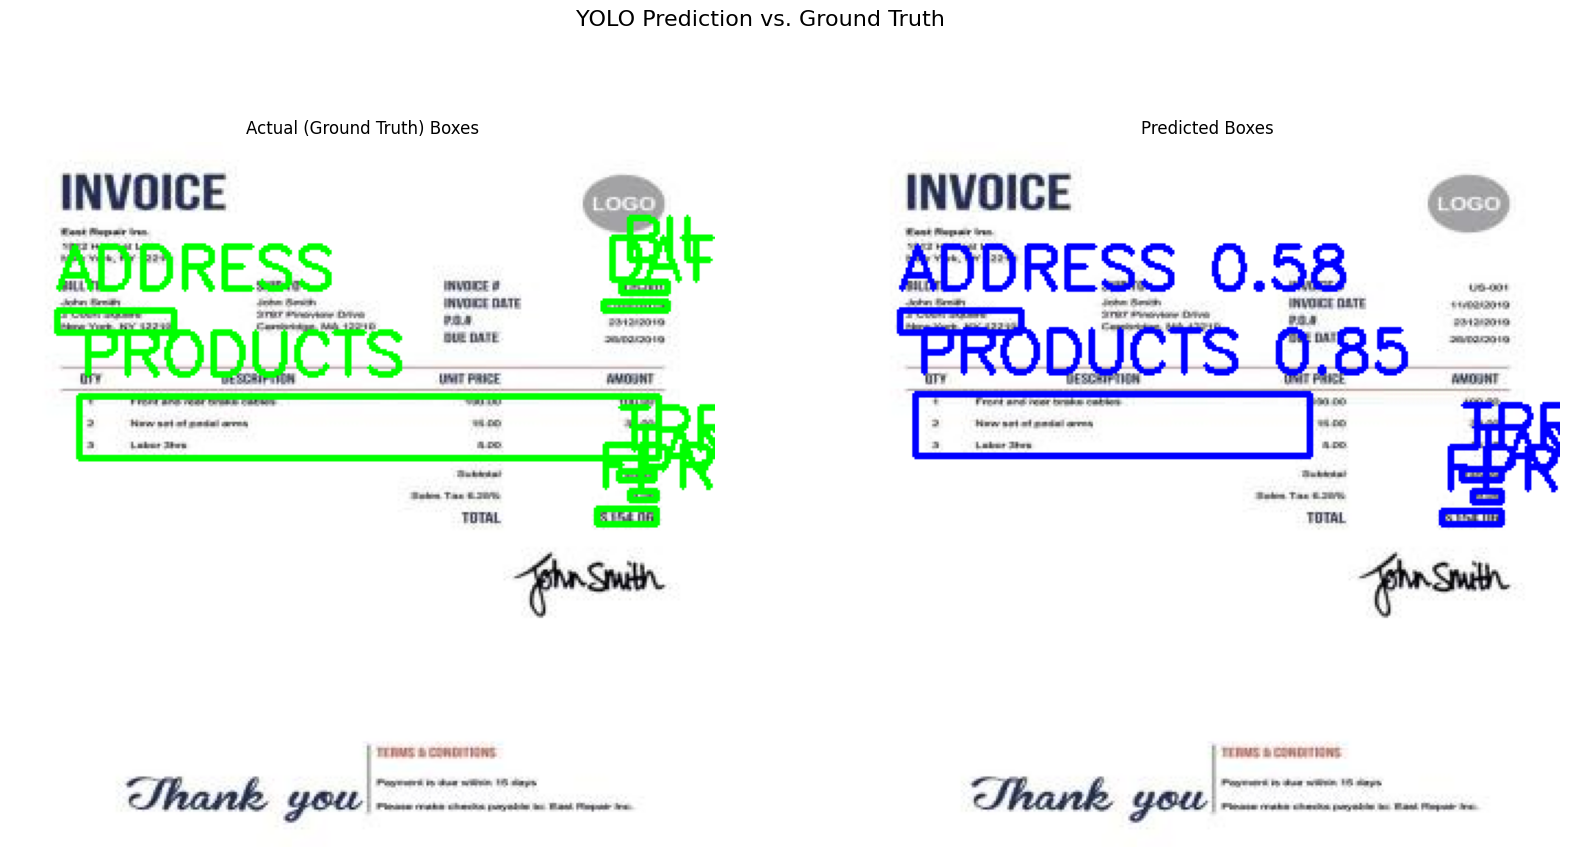

In [11]:
import cv2
from pathlib import Path
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np


def plot_ground_truth(image_bgr, label_path, class_names):
    """
    Reads a YOLOv8 label file and draws the ground truth bounding boxes on the image.

    Args:
        image_bgr (np.ndarray): The image in BGR format (as loaded by OpenCV).
        label_path (Path): The path to the YOLOv8 .txt label file.
        class_names (dict): A dictionary mapping class indices to class names.

    Returns:
        np.ndarray: The image with ground truth boxes drawn on it.
    """
    img_with_boxes = image_bgr.copy()
    height, width, _ = img_with_boxes.shape

    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, box_width, box_height = map(float, parts[1:])

            # Convert normalized coordinates to pixel coordinates
            x_center_px = x_center * width
            y_center_px = y_center * height
            box_width_px = box_width * width
            box_height_px = box_height * height

            # Calculate top-left and bottom-right corners
            x1 = int(x_center_px - (box_width_px / 2))
            y1 = int(y_center_px - (box_height_px / 2))
            x2 = int(x_center_px + (box_width_px / 2))
            y2 = int(y_center_px + (box_height_px / 2))

            # Draw the bounding box
            label = class_names.get(class_id, "Unknown")
            color = (0, 255, 0)  # Green for ground truth
            cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), color, 2)

            # Draw the label
            cv2.putText(
                img_with_boxes,
                label,
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.9,
                color,
                2,
            )
    return img_with_boxes


def plot_predictions(image_bgr, filtered_boxes, class_names):
    """
    Draws the filtered, most-confident bounding boxes on the image.

    Args:
        image_bgr (np.ndarray): The image in BGR format.
        filtered_boxes (dict): A dictionary of {class_id: (confidence, box_coords)}.
        class_names (dict): A dictionary mapping class indices to class names.

    Returns:
        np.ndarray: The image with predicted boxes drawn on it.
    """
    img_with_boxes = image_bgr.copy()

    for class_id, (confidence, box) in filtered_boxes.items():
        # Convert coordinates to integers
        x1, y1, x2, y2 = map(int, box)

        label = class_names.get(class_id, "Unknown")
        conf_text = f"{label} {confidence:.2f}"
        color = (255, 0, 0)  # Blue for predictions

        # Draw the bounding box
        cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), color, 2)

        # Draw the label with confidence score
        cv2.putText(
            img_with_boxes,
            conf_text,
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            color,
            2,
        )
    return img_with_boxes


def main():
    # --- Configuration ---
    model_path = "model/best.pt"
    image_source = "data/test/images/51.jpg"  # 298
    label_path = "data/test/labels/51.txt"  # 298
    device = "mps"
    inference_resolution = 1024  # You can increase the resolution here

    # --- Load Model ---
    model = YOLO(model_path)

    # --- Run Inference ---
    results = model.predict(
        source=image_source, save=False, device=device, imgsz=inference_resolution
    )

    # --- Filter predictions to keep only the most confident for each class ---
    best_predictions = {}
    if results[0].boxes:
        for box in results[0].boxes:
            class_id = int(box.cls[0])
            confidence = float(box.conf[0])

            # If class not seen yet, or current box is more confident, store it
            if (
                class_id not in best_predictions
                or confidence > best_predictions[class_id][0]
            ):
                # Store confidence and box coordinates (as a numpy array)
                best_predictions[class_id] = (confidence, box.xyxy[0].cpu().numpy())

    # --- Load original image once ---
    image_path = Path(image_source)
    original_img_bgr = cv2.imread(str(image_path))

    # --- Get Predicted Boxes Image ---
    predictions_img_bgr = plot_predictions(
        original_img_bgr, best_predictions, model.names
    )
    predictions_img_rgb = cv2.cvtColor(predictions_img_bgr, cv2.COLOR_BGR2RGB)

    # --- Get Ground Truth Boxes Image ---
    # label_path = image_path.parent.parent / "labels" / f"{image_path.stem}.txt"
    ground_truth_img_bgr = plot_ground_truth(original_img_bgr, label_path, model.names)
    ground_truth_img_rgb = cv2.cvtColor(ground_truth_img_bgr, cv2.COLOR_BGR2RGB)

    # --- Display Results Side-by-Side ---
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle("YOLO Prediction vs. Ground Truth", fontsize=16)
    axs[0].imshow(ground_truth_img_rgb)
    axs[0].set_title("Actual (Ground Truth) Boxes")
    axs[0].axis("off")
    axs[1].imshow(predictions_img_rgb)
    axs[1].set_title("Predicted Boxes")
    axs[1].axis("off")
    plt.show()


main()